In [1]:
#TASK 01
# Import libraries
import pandas as pd  
import numpy as np   
import matplotlib.pyplot as plt  
import seaborn as sns

df=pd.read_csv('/kaggle/input/students-performance-10000-clean-data-eda/Student_performance_10k.csv')
df.head()

,roll_no,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,science_score,total_score,grade
0,std-01,male,group D,some college,1.0,1.0,89,38.0,85.0,26.0,238.0,C
1,std-02,male,group B,high school,1.0,0.0,65,100.0,67.0,96.0,328.0,A
2,std-03,male,group C,master's degree,1.0,0.0,10,99.0,97.0,58.0,264.0,B
3,std-04,male,group D,some college,1.0,1.0,22,51.0,41.0,84.0,198.0,D
4,std-05,male,group C,some college,0.0,1.0,26,58.0,64.0,65.0,213.0,C


In [2]:
#TASK 02
print("Shape:", df.shape)
print()
print("Column names:")
print(df.columns)
print()
print("Dataset information:")
df.info()
print()
print("Summary of numeric columns:")
print(df.describe())


Shape: (10000, 12)

Column names:
Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   roll_no                      9999 non-null   object 
 1   gender                       9982 non-null   object 
 2   race_ethnicity               9977 non-null   object 
 3   parental_level_of_education  9978 non-null   object 
 4   lunch                        9976 non-null   float64
 5   test_preparation_course      9977 non-null   float64
 6   math_score                   9976 non-null   object 
 7   reading_score                9975 non-null   float64
 8   writing_scor

In [3]:
#TASK 04 
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed. New shape of the dataset:", df.shape)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [4]:
#TASK 06
print("Columns before dropping:")
print(df.columns)
df = df.drop(['roll_no'], axis=1)
print()
print("Columns after dropping:")
print(df.columns)


Columns before dropping:
Index(['roll_no', 'gender', 'race_ethnicity', 'parental_level_of_education',
       'lunch', 'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')

Columns after dropping:
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'science_score', 'total_score', 'grade'],
      dtype='object')


In [6]:
#TASK 07
cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']
for c in cat_cols:
    if c in df.columns:
        df[c] = df[c].astype('category')

num_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce') 
        df[col] = df[col].astype(float)

print()
print("Data types after conversion:")
print(df.dtypes)



Data types after conversion:
gender                         category
race_ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                      float64
reading_score                   float64
writing_score                   float64
science_score                   float64
total_score                     float64
grade                          category
dtype: object


Missing Values by Column:
gender                         18
race_ethnicity                 23
parental_level_of_education    22
lunch                          24
test_preparation_course        23
math_score                     25
reading_score                  25
writing_score                  24
science_score                  23
total_score                    19
grade                           3
dtype: int64


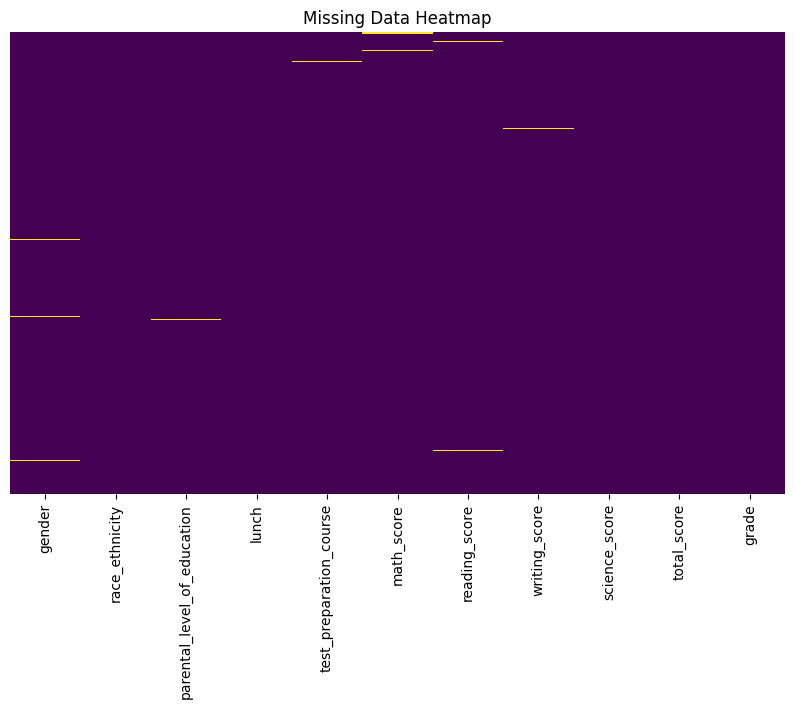

Cleaned DataFrame:
  gender race_ethnicity parental_level_of_education lunch  \
0   male        group D                some college   1.0   
1   male        group B                 high school   1.0   
2   male        group C             master's degree   1.0   
3   male        group D                some college   1.0   
4   male        group C                some college   0.0   

  test_preparation_course  math_score  reading_score  writing_score  \
0                     1.0        89.0           38.0           85.0   
1                     0.0        65.0          100.0           67.0   
2                     0.0        10.0           99.0           97.0   
3                     1.0        22.0           51.0           41.0   
4                     1.0        26.0           58.0           64.0   

   science_score  total_score grade  
0           26.0        238.0     C  
1           96.0        328.0     A  
2           58.0        264.0     B  
3           84.0        198.0     D

In [7]:
#TASK 03
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Missing Values by Column:")
print(df.isnull().sum())

#Visualize missing data using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

categorical_columns = df.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode()[0])

print("Cleaned DataFrame:")
print(df.head())
 

Distribution of categorical variables:

gender:
gender
female    4983
male      4982
Girl        10
Boy          6
\tmale       1
Name: count, dtype: int64

grade:
grade
B       5659
C       2701
A        904
D        671
Fail      62
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


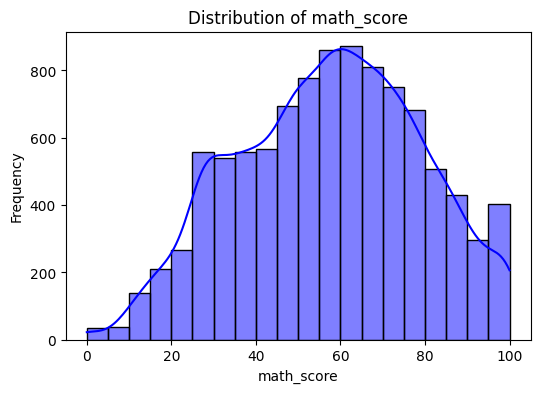

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


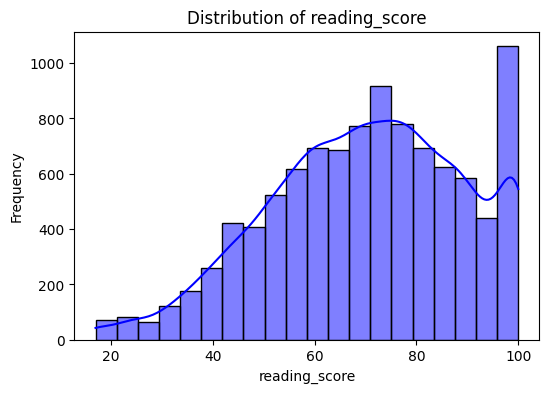

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


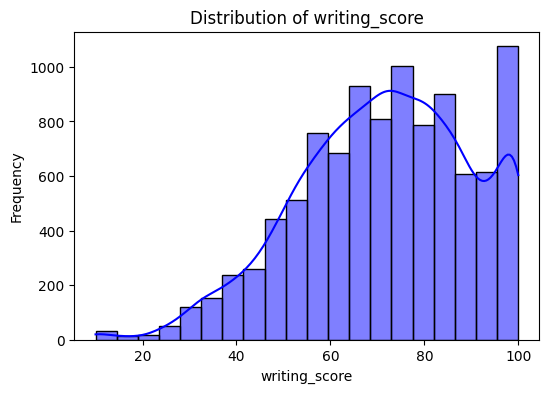

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


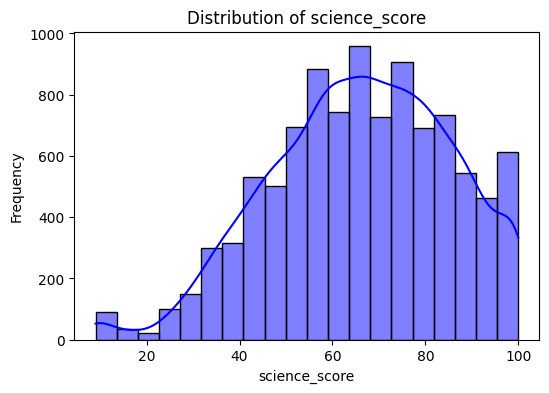

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


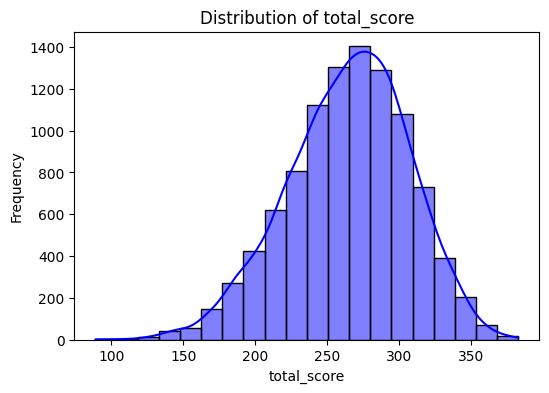

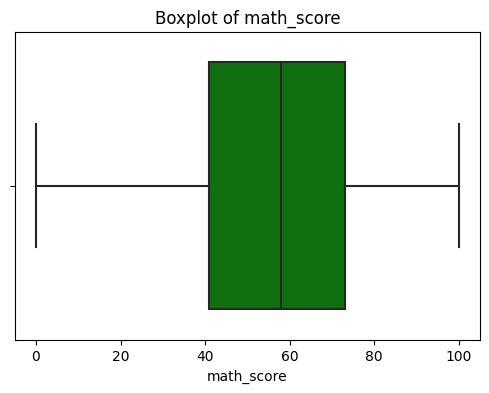

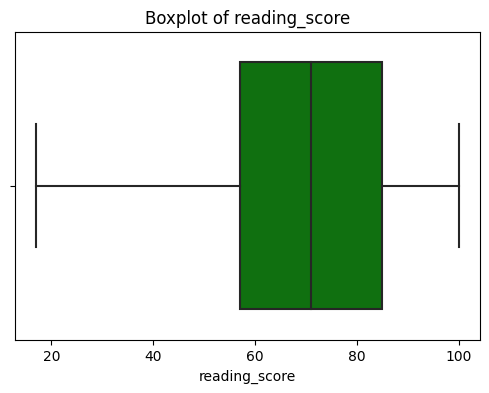

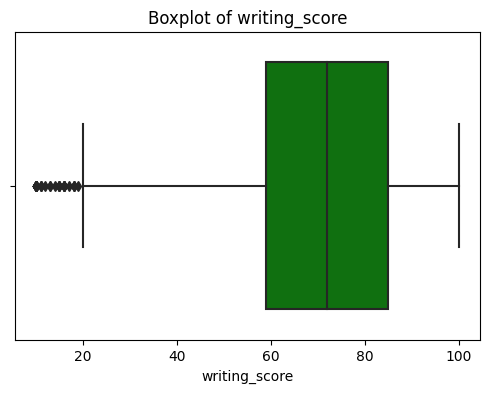

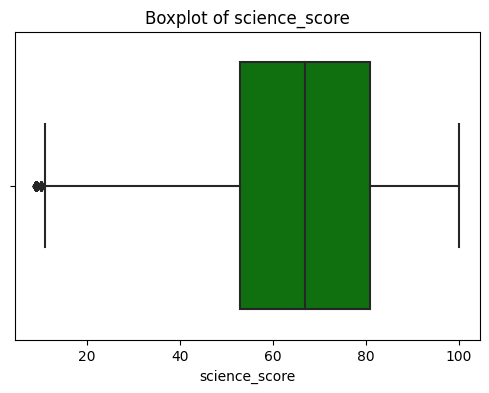

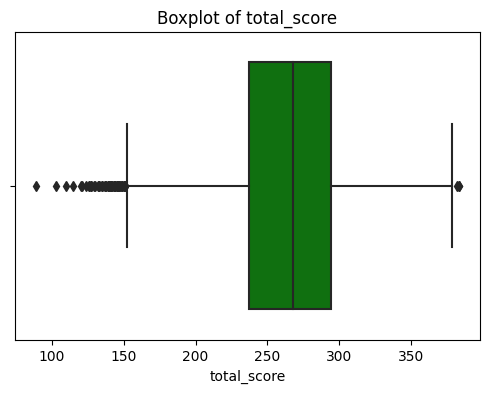

In [8]:
#TASK 08
import seaborn as sns
import matplotlib.pyplot as plt

print("Distribution of categorical variables:")
cat_cols = ['gender', 'grade']
for col in cat_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts())

num_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(df[col], kde=True, bins=20, color='blue')
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='green')
        plt.title(f"Boxplot of {col}")
        plt.xlabel(col)
        plt.show()



Outliers in math_score:
Lower bound: -7.0, Upper bound: 121.0

Outliers in reading_score:
Lower bound: 15.0, Upper bound: 127.0

Outliers in writing_score:
Lower bound: 20.0, Upper bound: 124.0

Outliers in science_score:
Lower bound: 11.0, Upper bound: 123.0

Outliers in total_score:
Lower bound: 151.5, Upper bound: 379.5


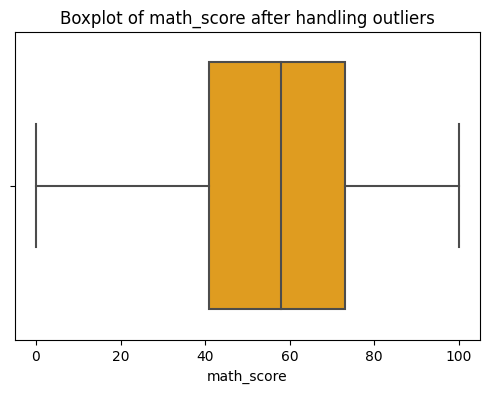

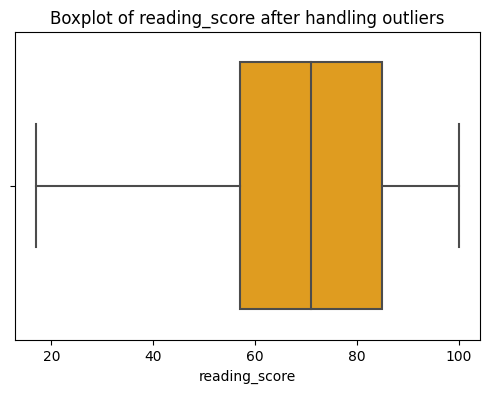

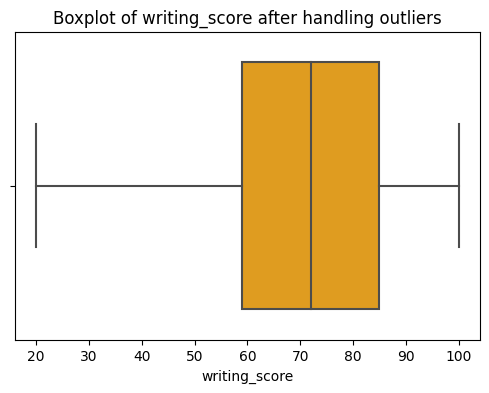

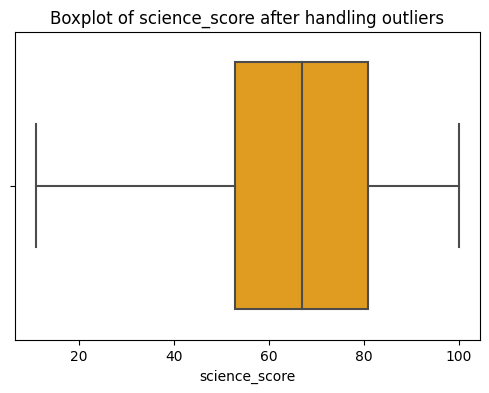

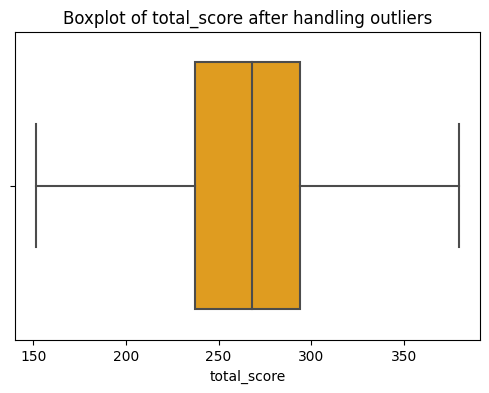

In [9]:
#TASK 09
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)  # 25th percentile (first quartile)
    Q3 = data[column].quantile(0.75)  # 75th percentile (third quartile)
    IQR = Q3 - Q1                     # Interquartile range
    lower = Q1 - 1.5 * IQR            # Lower bound
    upper = Q3 + 1.5 * IQR            # Upper bound

    print(f"\nOutliers in {column}:")
    print(f"Lower bound: {lower}, Upper bound: {upper}")
    data[column] = data[column].clip(lower=lower, upper=upper)
    return data

num_cols = ['math_score', 'reading_score', 'writing_score', 'science_score', 'total_score']
for col in num_cols:
    if col in df.columns:
        df = handle_outliers(df, col)

import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[col], color='orange')
        plt.title(f"Boxplot of {col} after handling outliers")
        plt.xlabel(col)
        plt.show()


In [10]:
#TASK 10 
from sklearn.preprocessing import LabelEncoder

cat_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'grade']

#One-Hot Encoding using pd.get_dummies()
one_hot_encoded_df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
print("One-hot encoding completed. Sample:\n")
print(one_hot_encoded_df.head())

#Label Encoding 
le = LabelEncoder()
for col in cat_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

print("\nLabel encoding completed. Sample:\n")
print(df[cat_cols].head())
 

One-hot encoding completed. Sample:

   math_score  reading_score  writing_score  science_score  total_score  \
0        89.0           38.0           85.0           26.0        238.0   
1        65.0          100.0           67.0           96.0        328.0   
2        10.0           99.0           97.0           58.0        264.0   
3        22.0           51.0           41.0           84.0        198.0   
4        26.0           58.0           64.0           65.0        213.0   

   gender_Girl  gender_\tmale  gender_female  gender_male  race_ethnicity_B  \
0        False          False          False         True             False   
1        False          False          False         True             False   
2        False          False          False         True             False   
3        False          False          False         True             False   
4        False          False          False         True             False   

   ...  parental_level_of_education_h

Correlation Matrix:

                               gender  race_ethnicity  \
gender                       1.000000        0.037157   
race_ethnicity               0.037157        1.000000   
parental_level_of_education -0.014918        0.018374   
lunch                       -0.075329        0.008432   
test_preparation_course     -0.032490       -0.012034   
math_score                  -0.275447       -0.017110   
reading_score                0.060919       -0.007902   
writing_score               -0.255654       -0.007798   
science_score               -0.123885       -0.016525   
total_score                 -0.281825       -0.023359   
grade                        0.272471        0.017124   

                             parental_level_of_education     lunch  \
gender                                         -0.014918 -0.075329   
race_ethnicity                                  0.018374  0.008432   
parental_level_of_education                     1.000000  0.007747   
lunch         

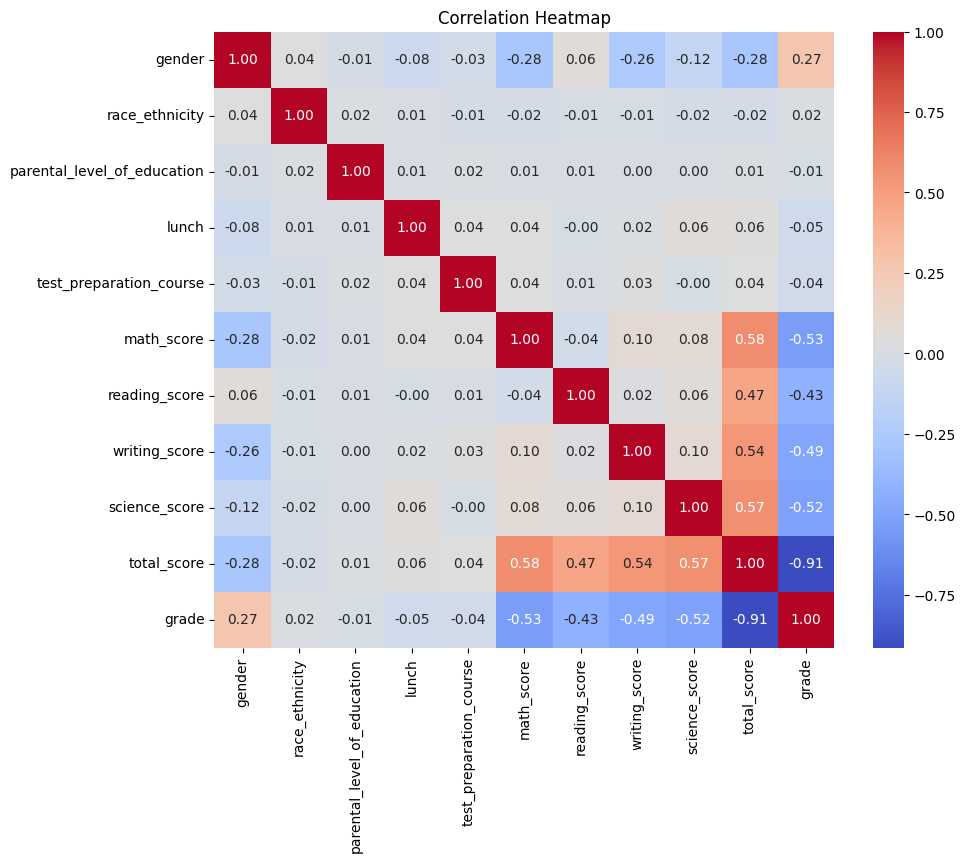

In [11]:
#TASK 11
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()
print("Correlation Matrix:\n")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Heatmap")
plt.show()


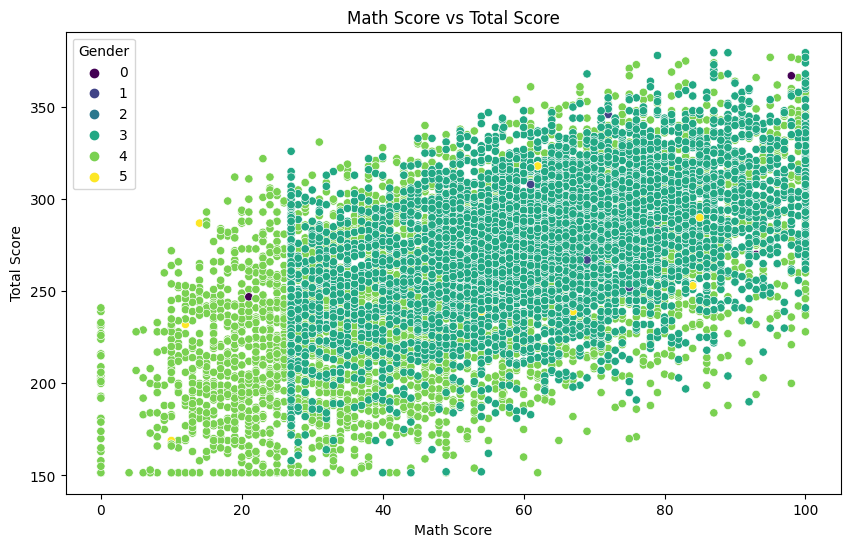

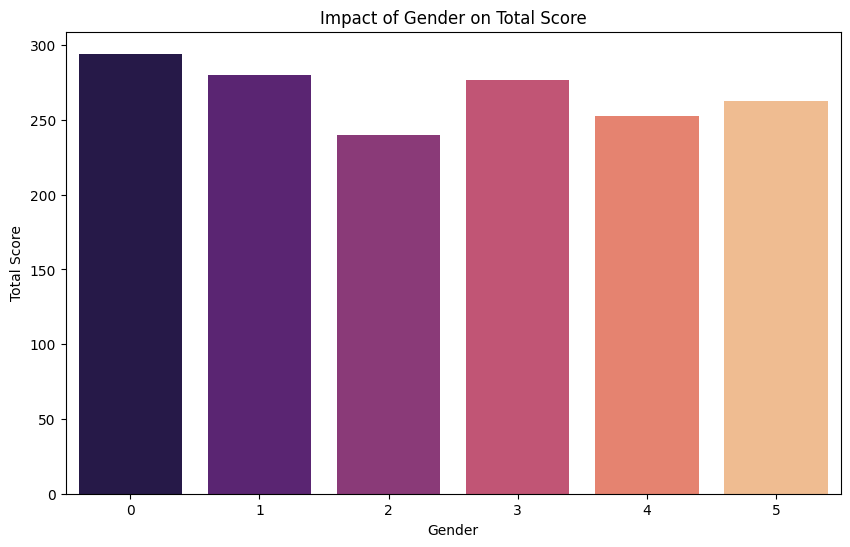

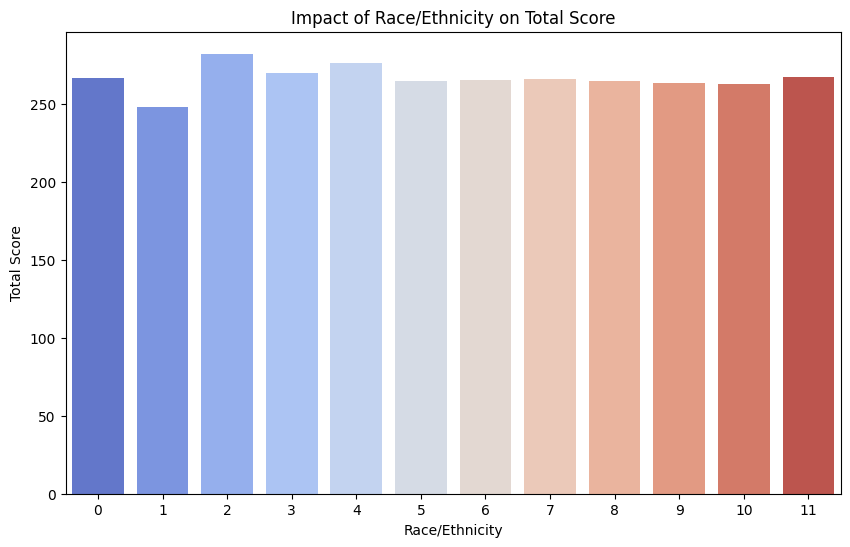

In [13]:
#TASK 12 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 12: Investigate Relationships

# 1. Scatter plot: Compare math_score vs. total_score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math_score', y='total_score', hue='gender', palette='viridis')
plt.title('Math Score vs Total Score')
plt.xlabel('Math Score')
plt.ylabel('Total Score')
plt.legend(title='Gender')
plt.show()

# 2. Bar plot: Impact of gender on total_score
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='total_score', errorbar=None, palette='magma')
plt.title('Impact of Gender on Total Score')
plt.xlabel('Gender')
plt.ylabel('Total Score')
plt.show()

# 3. Bar plot: Impact of race_ethnicity on total_score
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='race_ethnicity', y='total_score', errorbar=None, palette='coolwarm')
plt.title('Impact of Race/Ethnicity on Total Score')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Total Score')
plt.show()


In [22]:
# TASK 13
max_score =379.5  
df['performance_ratio'] = df['total_score'] / max_score


bins = [0, 200, 300, 379.5] 
labels = ['Low', 'Medium', 'High']
df['performance_category'] = pd.cut(df['total_score'], bins=bins, labels=labels, right=True)

print(df[['total_score', 'performance_ratio', 'performance_category']].head())



   total_score  performance_ratio performance_category
0        238.0           0.627141               Medium
1        328.0           0.864295                 High
2        264.0           0.695652               Medium
3        198.0           0.521739                  Low
4        213.0           0.561265               Medium


In [ ]:
#TASK 14 
'''Key Insights:

Missing Data: Handled missing values by filling numeric columns with the mean and categorical columns with the mode.
Descriptive Statistics: Scores vary widely, with both high and low performers.
Gender Balance: Gender distribution is almost equal.
Parental Education: Higher parental education is linked to better student performance.
Test Preparation: Students who completed the test prep course performed better.
Score Range: Total scores range from 198 to 400, with most students scoring in the middle.
Patterns and Trends:

Gender: No significant performance difference between genders.
Test Prep Impact: Test prep correlates with higher scores.
Parental Influence: Students with more educated parents tend to score higher.
Performance Categories: Most students fall into the "Medium" performance category, with some in the "Low" category.
Outliers: Some students are outliers in their scores, indicating extreme performance.'''

In [23]:
#TASK 03
import pandas as pd

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")
# Convert math_score and other relevant columns to numeric
df['math_score'] = pd.to_numeric(df['math_score'], errors='coerce')  # Coerce invalid values to NaN
df['reading_score'] = pd.to_numeric(df['reading_score'], errors='coerce')
df['writing_score'] = pd.to_numeric(df['writing_score'], errors='coerce')
df['total_score'] = pd.to_numeric(df['total_score'], errors='coerce')


print(f"NaN values in math_score: {df['math_score'].isnull().sum()}")
print(f"NaN values in reading_score: {df['reading_score'].isnull().sum()}")
print(f"NaN values in writing_score: {df['writing_score'].isnull().sum()}")
print(f"NaN values in total_score: {df['total_score'].isnull().sum()}")

df['math_score'] = df['math_score'].fillna(df['math_score'].mean())
df['reading_score'] = df['reading_score'].fillna(df['reading_score'].mean())
df['writing_score'] = df['writing_score'].fillna(df['writing_score'].mean()) 
df['total_score'] = df['total_score'].fillna(df['total_score'].mean()) 


print(df.head())


NaN values in math_score: 0
NaN values in reading_score: 0
NaN values in writing_score: 0
NaN values in total_score: 0
   gender  race_ethnicity  parental_level_of_education  lunch  \
0       4               9                            4      1   
1       4               6                            2      1   
2       4               7                            3      1   
3       4               9                            4      1   
4       4               7                            4      0   

   test_preparation_course  math_score  reading_score  writing_score  \
0                        1        89.0           38.0           85.0   
1                        0        65.0          100.0           67.0   
2                        0        10.0           99.0           97.0   
3                        1        22.0           51.0           41.0   
4                        1        26.0           58.0           64.0   

   science_score  total_score  grade  performance_ratio p